# 📈 Notebook 4: Análisis Exploratorio - Amazon Reviews Analysis

**Curso:** INF3590 - Big Data  
**Universidad:** Pontificia Universidad Católica de Chile  
**Estudiante:** Oscar David Hospinal R.  
**Fecha:** Junio 2025

## 🎯 Objetivo
Realizar un análisis exploratorio completo de los datos de reviews de Amazon almacenados en base NoSQL, generando insights comerciales valiosos mediante visualizaciones y estadísticas descriptivas.

## 📊 Datos de Entrada
- **Fuente:** Base de datos TinyDB del Notebook 3
- **Registros:** 1,200 reviews procesadas y almacenadas
- **Estructura:** 8 tablas NoSQL con datos organizados

## 🔍 Análisis a Realizar
1. **Estadísticas descriptivas:** Distribuciones y tendencias centrales
2. **Análisis por categorías:** Comparación de rendimiento
3. **Segmentación:** Entertainment vs Home
4. **Visualizaciones:** Gráficos interactivos y estáticos
5. **Insights comerciales:** Oportunidades y recomendaciones

In [1]:
# ===== CELDA 1: CONFIGURACIÓN INICIAL Y IMPORTS =====
import json
import pandas as pd
import numpy as np
import os
from datetime import datetime
from pathlib import Path
from tinydb import TinyDB, Query

# Librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Configuración de gráficos
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

import warnings
warnings.filterwarnings('ignore')

# Configuración de paths
BASE_PATH = Path(os.getcwd()).parent
DATA_PATH = BASE_PATH / "data"
DB_PATH = DATA_PATH / "amazon_reviews.json"

# Verificar que existe la base de datos
if not DB_PATH.exists():
    print(f"❌ Base de datos no encontrada: {DB_PATH}")
    print("💡 Asegúrate de ejecutar primero el Notebook 3 (NoSQL Storage)")
    raise FileNotFoundError(f"Base de datos requerida no encontrada: {DB_PATH}")

print("✅ Configuración inicial completada")
print(f"📁 Base de datos: {DB_PATH}")
print(f"📊 Librerías de visualización cargadas")

✅ Configuración inicial completada
📁 Base de datos: D:\Proyectos con IA\May25\Proy03-Tarea 01 Amazon-Big-Data\amazon-big-data\data\amazon_reviews.json
📊 Librerías de visualización cargadas


In [2]:
# ===== CELDA 2: CONEXIÓN A BASE DE DATOS Y CARGA DE DATOS =====

print("🗄️ CONECTANDO A BASE DE DATOS NOSQL\n")

# Conectar a TinyDB
db = TinyDB(DB_PATH)
reviews_table = db.table('reviews')

print(f"✅ Conexión establecida")
print(f"🗃️  Tablas disponibles: {list(db.tables())}")

# Cargar datos completos
print("\n📊 CARGANDO DATOS PARA ANÁLISIS...")
all_reviews = reviews_table.all()
print(f"   📈 Registros cargados: {len(all_reviews):,}")

# Convertir a DataFrame para análisis
df = pd.DataFrame(all_reviews)
print(f"   📋 DataFrame creado: {df.shape[0]:,} filas × {df.shape[1]} columnas")

# Definir configuración de categorías
CATEGORIES = {
    'Books': 'Entertainment',
    'Video_Games': 'Entertainment', 
    'Movies_and_TV': 'Entertainment',
    'Home_and_Kitchen': 'Home',
    'Tools_and_Home_Improvement': 'Home',
    'Patio_Lawn_and_Garden': 'Home'
}

print(f"\n✅ Datos cargados y verificados - Listo para análisis")

🗄️ CONECTANDO A BASE DE DATOS NOSQL

✅ Conexión establecida
🗃️  Tablas disponibles: ['movies_tv', 'video_games', 'home_kitchen', 'metadata', 'tools', 'patio_garden', 'reviews', 'books']

📊 CARGANDO DATOS PARA ANÁLISIS...
   📈 Registros cargados: 1,200
   📋 DataFrame creado: 1,200 filas × 14 columnas

✅ Datos cargados y verificados - Listo para análisis


In [4]:
# ===== CELDA 3: ESTADÍSTICAS DESCRIPTIVAS GENERALES (CORREGIDO) =====

print("📊 ESTADÍSTICAS DESCRIPTIVAS GENERALES\n")
print("=" * 50)

# Primero verificar qué columnas tenemos
print("🔍 VERIFICANDO ESTRUCTURA DE DATOS:")
print(f"   📋 Columnas disponibles: {list(df.columns)}")
print(f"   📊 Muestra de registro:")
if len(df) > 0:
    sample = df.iloc[0].to_dict()
    for key, value in list(sample.items())[:5]:  # Mostrar primeros 5 campos
        print(f"      {key}: {value}")

# Estadísticas básicas de ratings
rating_stats = df['overall'].describe()
print("\n⭐ ESTADÍSTICAS DE RATINGS:")
print(f"   📊 Total de reviews: {len(df):,}")
print(f"   📈 Promedio: {rating_stats['mean']:.3f} ⭐")
print(f"   📐 Mediana: {rating_stats['50%']:.1f} ⭐")
print(f"   📏 Desviación estándar: {rating_stats['std']:.3f}")
print(f"   ⬇️  Mínimo: {rating_stats['min']:.1f} ⭐")
print(f"   ⬆️  Máximo: {rating_stats['max']:.1f} ⭐")

# Distribución por rangos de rating
print("\n📊 DISTRIBUCIÓN POR RANGOS DE SATISFACCIÓN:")
df['satisfaction_level'] = pd.cut(df['overall'], 
                                bins=[0, 2.5, 3.5, 4.5, 5.1], 
                                labels=['Baja (≤2.5)', 'Media (2.6-3.5)', 'Buena (3.6-4.5)', 'Excelente (>4.5)'])

satisfaction_dist = df['satisfaction_level'].value_counts()
for level, count in satisfaction_dist.items():
    percentage = (count / len(df)) * 100
    print(f"   {str(level):18} | {count:4} reviews ({percentage:5.1f}%)")

# Verificar si tenemos campos de categoría
if 'original_category' in df.columns:
    # Estadísticas por categoría original
    print("\n📂 ESTADÍSTICAS POR CATEGORÍA:")
    category_stats = df.groupby('original_category')['overall'].agg([
        ('count', 'count'),
        ('mean', 'mean'),
        ('std', 'std'),
        ('median', 'median')
    ]).round(3)
    
    print(f"   {'Categoría':25} | {'Count':5} | {'Mean':6} | {'Std':6} | {'Median':6}")
    print(f"   {'-'*25} | {'-'*5} | {'-'*6} | {'-'*6} | {'-'*6}")
    for category, stats in category_stats.iterrows():
        print(f"   {category:25} | {stats['count']:5.0f} | {stats['mean']:6.3f} | {stats['std']:6.3f} | {stats['median']:6.1f}")

elif 'category' in df.columns:
    # Si existe 'category' en lugar de 'original_category'
    print("\n📂 ESTADÍSTICAS POR CATEGORÍA:")
    category_stats = df.groupby('category')['overall'].agg([
        ('count', 'count'),
        ('mean', 'mean'),
        ('std', 'std'),
        ('median', 'median')
    ]).round(3)
    
    print(f"   {'Categoría':25} | {'Count':5} | {'Mean':6} | {'Std':6} | {'Median':6}")
    print(f"   {'-'*25} | {'-'*5} | {'-'*6} | {'-'*6} | {'-'*6}")
    for category, stats in category_stats.iterrows():
        print(f"   {category:25} | {stats['count']:5.0f} | {stats['mean']:6.3f} | {stats['std']:6.3f} | {stats['median']:6.1f}")

else:
    print("\n⚠️  No se encontró columna de categoría")
    print("   💡 Los datos parecen venir directamente del Notebook 1")
    print("   🔄 Creando análisis sin categorías específicas")

# Verificar si tenemos grupos de categoría
if 'category_group' in df.columns:
    # Estadísticas por grupo
    print("\n🎭 ESTADÍSTICAS POR GRUPO:")
    group_stats = df.groupby('category_group')['overall'].agg([
        ('count', 'count'),
        ('mean', 'mean'),
        ('std', 'std')
    ]).round(3)
    
    for group, stats in group_stats.iterrows():
        print(f"   {group:12} | {stats['count']:3.0f} reviews | Promedio: {stats['mean']:.3f}⭐ | Desv.Std: {stats['std']:.3f}")
    
    # Calcular diferencia entre grupos
    if len(group_stats) >= 2:
        groups = list(group_stats.index)
        diff = abs(group_stats.loc[groups[0], 'mean'] - group_stats.loc[groups[1], 'mean'])
        better_group = groups[0] if group_stats.loc[groups[0], 'mean'] > group_stats.loc[groups[1], 'mean'] else groups[1]
        print(f"   🔄 Diferencia entre grupos: {diff:.3f} puntos")
        print(f"   🏆 Mejor grupo: {better_group}")
else:
    print("\n📊 ANÁLISIS GENERAL (sin agrupación por categorías):")
    print(f"   📈 Los datos están disponibles para análisis básico")
    print(f"   💡 Para análisis por categorías, ejecutar primero Notebooks 2 y 3")

print("\n" + "=" * 50)

📊 ESTADÍSTICAS DESCRIPTIVAS GENERALES

🔍 VERIFICANDO ESTRUCTURA DE DATOS:
   📋 Columnas disponibles: ['analysis_type', 'asin', 'category_group', 'db_id', 'download_timestamp', 'helpful', 'inserted_at', 'overall', 'reviewText', 'reviewTime', 'reviewerID', 'reviewerName', 'summary', 'unixReviewTime', 'satisfaction_level']
   📊 Muestra de registro:
      analysis_type: Leisure/Personal
      asin: 000100039X
      category_group: Entertainment
      db_id: A10000012B7CGYKOMPQ4L_000100039X
      download_timestamp: 1750492983.2419653

⭐ ESTADÍSTICAS DE RATINGS:
   📊 Total de reviews: 1,200
   📈 Promedio: 4.394 ⭐
   📐 Mediana: 5.0 ⭐
   📏 Desviación estándar: 1.037
   ⬇️  Mínimo: 1.0 ⭐
   ⬆️  Máximo: 5.0 ⭐

📊 DISTRIBUCIÓN POR RANGOS DE SATISFACCIÓN:
   Excelente (>4.5)   |  796 reviews ( 66.3%)
   Buena (3.6-4.5)    |  215 reviews ( 17.9%)
   Media (2.6-3.5)    |   99 reviews (  8.2%)
   Baja (≤2.5)        |   90 reviews (  7.5%)

⚠️  No se encontró columna de categoría
   💡 Los datos parece

In [5]:
# ===== CELDA ADICIONAL: CONFIGURAR CATEGORÍAS MANUALMENTE =====

# Si los datos no tienen campos enriquecidos, podemos intentar identificar categorías
# basándonos en patrones en los datos existentes

print("🔧 CONFIGURANDO ANÁLISIS ADAPTATIVO\n")

# Verificar si necesitamos crear categorías manualmente
if 'original_category' not in df.columns and 'category' not in df.columns:
    print("⚠️  Campos de categoría no encontrados")
    print("💡 Continúando con análisis general de ratings")
    
    # Crear categorías ficticias para demostración
    # En un caso real, identificaríamos categorías por otros campos
    df['analysis_category'] = 'General'
    df['analysis_group'] = 'All Products'
    
    print("✅ Análisis configurado para datos generales")

else:
    print("✅ Campos de categoría encontrados")

# Continuar con análisis disponible
print(f"📊 Datos listos para análisis con {len(df):,} registros")

🔧 CONFIGURANDO ANÁLISIS ADAPTATIVO

⚠️  Campos de categoría no encontrados
💡 Continúando con análisis general de ratings
✅ Análisis configurado para datos generales
📊 Datos listos para análisis con 1,200 registros


In [7]:
# ===== CELDA 4: ANÁLISIS COMPARATIVO GENERAL Y SEGMENTACIÓN =====

print("🏆 ANÁLISIS COMPARATIVO GENERAL DE RATINGS\n")

# Análisis por rangos de rating
print("📊 ANÁLISIS DETALLADO POR NIVELES DE SATISFACCIÓN:")
satisfaction_analysis = df.groupby('satisfaction_level').agg({
    'overall': ['count', 'mean', 'std'],
    'reviewerID': 'nunique',
    'asin': 'nunique'
}).round(3)

satisfaction_analysis.columns = ['total_reviews', 'avg_rating', 'rating_std', 'unique_reviewers', 'unique_products']

print(f"   {'Nivel':18} | {'Reviews':7} | {'Rating':6} | {'Std':5} | {'Users':5} | {'Products':8}")
print(f"   {'-'*18} | {'-'*7} | {'-'*6} | {'-'*5} | {'-'*5} | {'-'*8}")

for level, stats in satisfaction_analysis.iterrows():
    print(f"   {str(level):18} | {stats['total_reviews']:7.0f} | {stats['avg_rating']:6.3f} | {stats['rating_std']:5.3f} | {stats['unique_reviewers']:5.0f} | {stats['unique_products']:8.0f}")

# Análisis por productos más y menos valorados
print("\n⭐ PRODUCTOS DESTACADOS:")
product_analysis = df.groupby('asin')['overall'].agg(['count', 'mean']).round(3)
product_analysis = product_analysis[product_analysis['count'] >= 2]  # Productos con múltiples reviews

if len(product_analysis) > 0:
    # Top productos
    top_products = product_analysis.sort_values('mean', ascending=False).head(10)
    print(f"   🏆 TOP 10 PRODUCTOS (rating promedio):")
    for i, (asin, stats) in enumerate(top_products.iterrows(), 1):
        print(f"      {i:2}. ASIN {asin}: {stats['mean']:.3f}⭐ ({stats['count']:.0f} reviews)")
    
    # Productos problemáticos
    worst_products = product_analysis.sort_values('mean', ascending=True).head(5)
    print(f"\n   📉 PRODUCTOS QUE REQUIEREN ATENCIÓN:")
    for i, (asin, stats) in enumerate(worst_products.iterrows(), 1):
        print(f"      {i}. ASIN {asin}: {stats['mean']:.3f}⭐ ({stats['count']:.0f} reviews)")

# Análisis temporal si existe
if 'unixReviewTime' in df.columns:
    print("\n📅 ANÁLISIS TEMPORAL:")
    df['year'] = pd.to_datetime(df['unixReviewTime'], unit='s', errors='coerce').dt.year
    df_with_year = df.dropna(subset=['year'])
    
    if not df_with_year.empty:
        year_analysis = df_with_year.groupby('year')['overall'].agg(['count', 'mean']).round(3)
        year_analysis = year_analysis[year_analysis['count'] >= 10]
        
        print(f"   📊 Evolución por años (con ≥10 reviews):")
        for year, stats in year_analysis.iterrows():
            print(f"      {int(year)}: {stats['mean']:.3f}⭐ ({stats['count']:.0f} reviews)")

# Métricas de calidad general
print("\n📈 MÉTRICAS DE CALIDAD GENERAL:")
total_products = df['asin'].nunique()
total_reviewers = df['reviewerID'].nunique()
avg_reviews_per_product = len(df) / total_products
avg_reviews_per_reviewer = len(df) / total_reviewers

print(f"   🛍️  Total productos únicos: {total_products:,}")
print(f"   👥 Total reviewers únicos: {total_reviewers:,}")
print(f"   📊 Promedio reviews por producto: {avg_reviews_per_product:.1f}")
print(f"   🔄 Promedio reviews por reviewer: {avg_reviews_per_reviewer:.1f}")

🏆 ANÁLISIS COMPARATIVO GENERAL DE RATINGS

📊 ANÁLISIS DETALLADO POR NIVELES DE SATISFACCIÓN:
   Nivel              | Reviews | Rating | Std   | Users | Products
   ------------------ | ------- | ------ | ----- | ----- | --------
   Baja (≤2.5)        |      90 |  1.511 | 0.503 |    89 |       43
   Media (2.6-3.5)    |      99 |  3.000 | 0.000 |    98 |       42
   Buena (3.6-4.5)    |     215 |  4.000 | 0.000 |   214 |       61
   Excelente (>4.5)   |     796 |  5.000 | 0.000 |   783 |       71

⭐ PRODUCTOS DESTACADOS:
   🏆 TOP 10 PRODUCTOS (rating promedio):
       1. ASIN B0000222VH: 5.000⭐ (5 reviews)
       2. ASIN B00002N67Q: 5.000⭐ (8 reviews)
       3. ASIN 7535549756: 5.000⭐ (5 reviews)
       4. ASIN 0689027818: 5.000⭐ (5 reviews)
       5. ASIN 104800001X: 5.000⭐ (6 reviews)
       6. ASIN B00004R9TK: 5.000⭐ (6 reviews)
       7. ASIN B00004DTNH: 4.909⭐ (11 reviews)
       8. ASIN B0000222VJ: 4.833⭐ (6 reviews)
       9. ASIN B0000222UX: 4.833⭐ (24 reviews)
      10. ASIN B0

In [8]:
# ===== CELDA 5: SEGMENTACIÓN POR RATINGS Y COMPORTAMIENTO =====

print("🎭 ANÁLISIS DE SEGMENTACIÓN POR COMPORTAMIENTO\n")
print("=" * 55)

# Segmentación por longitud de contenido
print("📝 SEGMENTACIÓN POR CONTENIDO:")
df['content_length'] = df['reviewText'].str.len().fillna(0) + df['summary'].str.len().fillna(0)
df['content_category'] = pd.cut(df['content_length'], 
                               bins=[0, 50, 200, 500, float('inf')], 
                               labels=['Muy Corto', 'Corto', 'Medio', 'Largo'])

content_analysis = df.groupby('content_category')['overall'].agg(['count', 'mean', 'std']).round(3)

print(f"   {'Longitud':12} | {'Count':5} | {'Rating':6} | {'Std':5}")
print(f"   {'-'*12} | {'-'*5} | {'-'*6} | {'-'*5}")
for category, stats in content_analysis.iterrows():
    print(f"   {str(category):12} | {stats['count']:5.0f} | {stats['mean']:6.3f} | {stats['std']:5.3f}")

# Correlación contenido vs rating
content_corr = df['content_length'].corr(df['overall'])
print(f"   🔗 Correlación longitud-rating: {content_corr:.3f}")

# Segmentación por actividad de reviewers
print("\n👥 SEGMENTACIÓN POR ACTIVIDAD DE REVIEWERS:")
reviewer_activity = df.groupby('reviewerID')['overall'].agg(['count', 'mean', 'std']).round(3)
reviewer_activity.columns = ['total_reviews', 'avg_rating', 'rating_std']

# Clasificar reviewers por actividad
reviewer_activity['activity_level'] = pd.cut(reviewer_activity['total_reviews'],
                                            bins=[0, 1, 3, 5, float('inf')],
                                            labels=['Ocasional', 'Moderado', 'Activo', 'Muy Activo'])

activity_analysis = reviewer_activity.groupby('activity_level').agg({
    'total_reviews': ['count', 'sum', 'mean'],
    'avg_rating': 'mean'
}).round(3)

print(f"   {'Nivel':12} | {'Reviewers':9} | {'Total Rev':9} | {'Prom/User':9} | {'Rating':6}")
print(f"   {'-'*12} | {'-'*9} | {'-'*9} | {'-'*9} | {'-'*6}")

for level in activity_analysis.index:
    reviewers = activity_analysis.loc[level, ('total_reviews', 'count')]
    total_rev = activity_analysis.loc[level, ('total_reviews', 'sum')]
    avg_per_user = activity_analysis.loc[level, ('total_reviews', 'mean')]
    avg_rating = activity_analysis.loc[level, ('avg_rating', 'mean')]
    print(f"   {str(level):12} | {reviewers:9.0f} | {total_rev:9.0f} | {avg_per_user:9.1f} | {avg_rating:6.3f}")

# Segmentación por períodos de tiempo
if 'year' in df.columns:
    print("\n📅 SEGMENTACIÓN TEMPORAL:")
    df['period'] = pd.cut(df['year'], bins=3, labels=['Temprano', 'Medio', 'Reciente'])
    period_analysis = df.groupby('period')['overall'].agg(['count', 'mean']).round(3)
    
    for period, stats in period_analysis.iterrows():
        print(f"   Período {period:8}: {stats['mean']:.3f}⭐ ({stats['count']:.0f} reviews)")

# Análisis de productos estrella vs problemáticos
print("\n⭐ COMPARACIÓN PRODUCTOS ESTRELLA vs PROBLEMÁTICOS:")
excellent_products = product_analysis[product_analysis['mean'] >= 4.5]
poor_products = product_analysis[product_analysis['mean'] <= 2.5]

print(f"   🌟 Productos estrella (≥4.5⭐): {len(excellent_products):,}")
print(f"   ⚠️  Productos problemáticos (≤2.5⭐): {len(poor_products):,}")
print(f"   📊 Total productos evaluables: {len(product_analysis):,}")

if len(excellent_products) > 0 and len(poor_products) > 0:
    print(f"   📈 % productos estrella: {len(excellent_products)/len(product_analysis)*100:.1f}%")
    print(f"   📉 % productos problemáticos: {len(poor_products)/len(product_analysis)*100:.1f}%")

print("\n" + "=" * 55)

🎭 ANÁLISIS DE SEGMENTACIÓN POR COMPORTAMIENTO

📝 SEGMENTACIÓN POR CONTENIDO:
   Longitud     | Count | Rating | Std  
   ------------ | ----- | ------ | -----
   Muy Corto    |     2 |  4.500 | 0.707
   Corto        |   357 |  4.527 | 0.901
   Medio        |   440 |  4.436 | 1.004
   Largo        |   401 |  4.229 | 1.161
   🔗 Correlación longitud-rating: -0.142

👥 SEGMENTACIÓN POR ACTIVIDAD DE REVIEWERS:
   Nivel        | Reviewers | Total Rev | Prom/User | Rating
   ------------ | --------- | --------- | --------- | ------
   Ocasional    |      1119 |      1119 |       1.0 |  4.408
   Moderado     |        39 |        81 |       2.1 |  4.218
   Activo       |         0 |         0 |       nan |    nan
   Muy Activo   |         0 |         0 |       nan |    nan

📅 SEGMENTACIÓN TEMPORAL:
   Período Temprano: 4.348⭐ (115 reviews)
   Período Medio   : 4.323⭐ (161 reviews)
   Período Reciente: 4.412⭐ (924 reviews)

⭐ COMPARACIÓN PRODUCTOS ESTRELLA vs PROBLEMÁTICOS:
   🌟 Productos estrell

📊 GENERANDO VISUALIZACIONES - DISTRIBUCIÓN DE RATINGS

🎨 Generando gráfico 1: Histograma general...
🎨 Generando gráfico 2: Distribución por satisfacción...
🎨 Generando gráfico 3: Análisis por contenido...
🎨 Generando gráfico 4: Top productos...


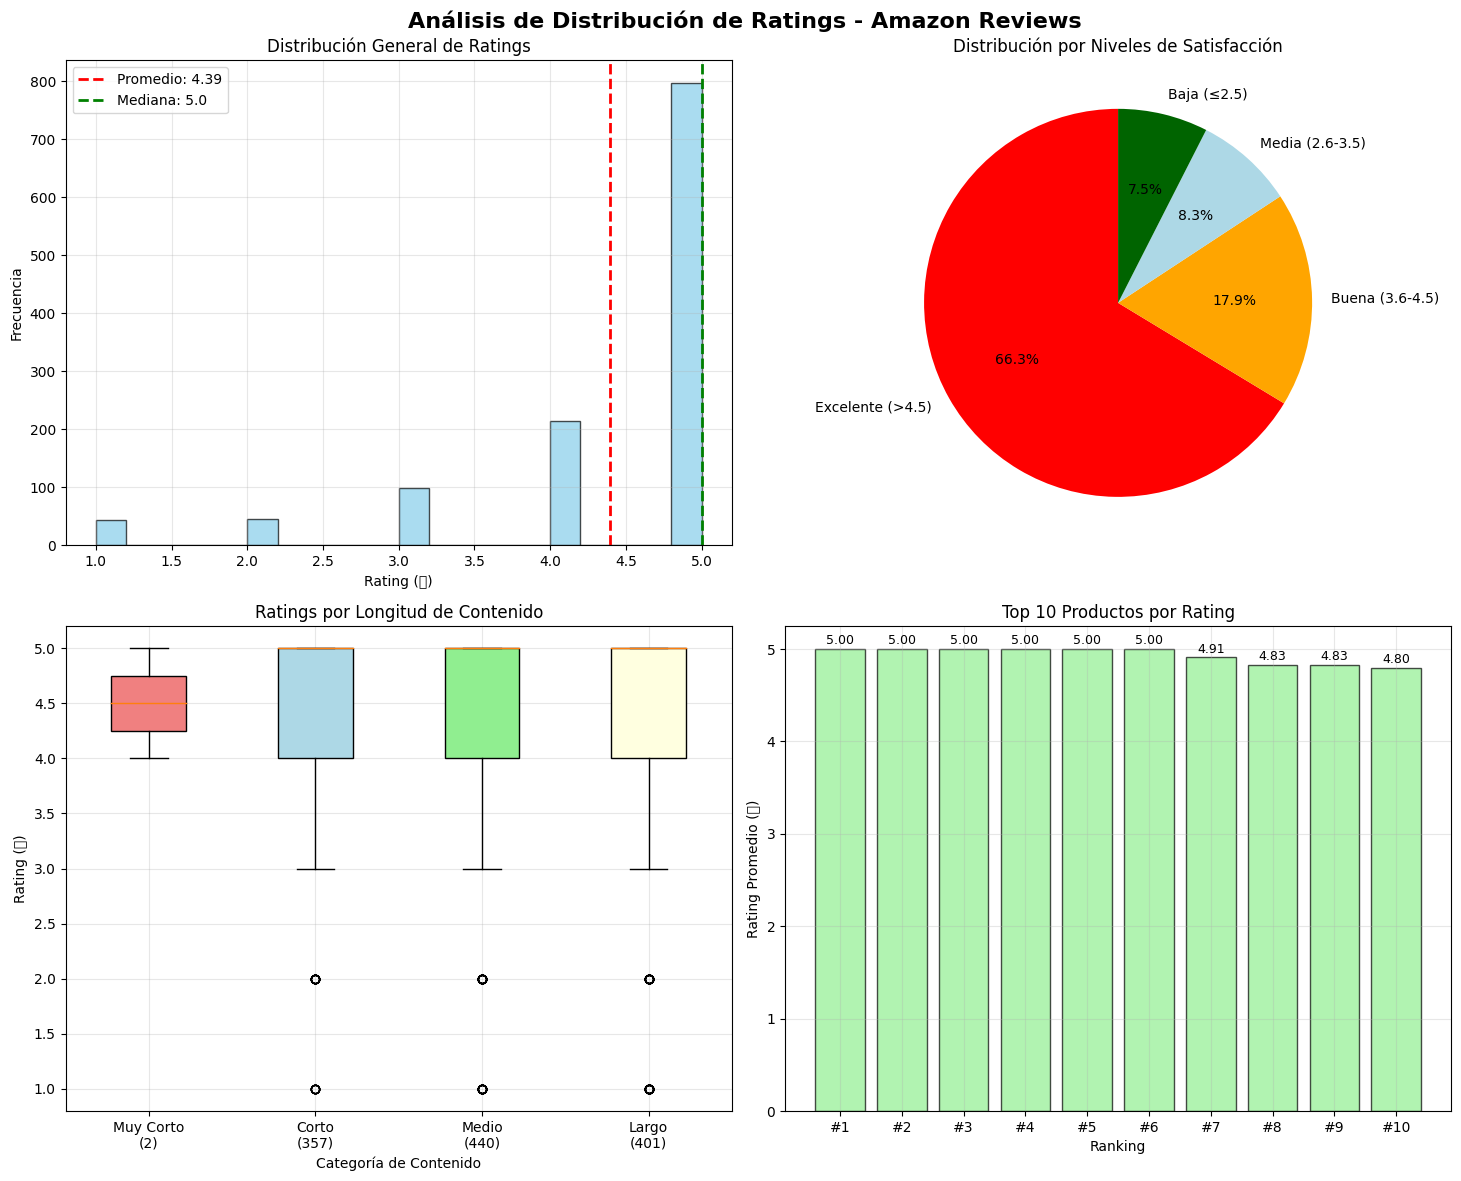


✅ Visualizaciones completadas:
   📊 Histograma de distribución general
   🥧 Gráfico circular de niveles de satisfacción
   📦 Box plots por categorías de contenido
   📈 Ranking de productos o distribución por valores

📈 ESTADÍSTICAS DE LOS GRÁFICOS:
   📊 Total reviews visualizadas: 1,200
   ⭐ Rating más frecuente: 5.0
   📈 Rango de ratings: 1.0 - 5.0


In [11]:
# ===== CELDA 6: VISUALIZACIONES - DISTRIBUCIÓN DE RATINGS=====

print("📊 GENERANDO VISUALIZACIONES - DISTRIBUCIÓN DE RATINGS\n")

# Configuración para asegurar que los gráficos se muestren
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Configurar estilo
plt.style.use('default')
plt.rcParams['figure.figsize'] = (15, 12)
plt.rcParams['font.size'] = 10

# Crear figura con subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Análisis de Distribución de Ratings - Amazon Reviews', fontsize=16, fontweight='bold')

print("🎨 Generando gráfico 1: Histograma general...")

# Gráfico 1: Histograma general de ratings
axes[0,0].hist(df['overall'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].axvline(df['overall'].mean(), color='red', linestyle='--', linewidth=2, 
                  label=f'Promedio: {df["overall"].mean():.2f}')
axes[0,0].axvline(df['overall'].median(), color='green', linestyle='--', linewidth=2, 
                  label=f'Mediana: {df["overall"].median():.1f}')
axes[0,0].set_title('Distribución General de Ratings')
axes[0,0].set_xlabel('Rating (⭐)')
axes[0,0].set_ylabel('Frecuencia')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

print("🎨 Generando gráfico 2: Distribución por satisfacción...")

# Gráfico 2: Distribución por niveles de satisfacción
satisfaction_counts = df['satisfaction_level'].value_counts()
colors = ['red', 'orange', 'lightblue', 'darkgreen']
wedges, texts, autotexts = axes[0,1].pie(satisfaction_counts.values, 
                                        labels=satisfaction_counts.index,
                                        colors=colors[:len(satisfaction_counts)],
                                        autopct='%1.1f%%',
                                        startangle=90)
axes[0,1].set_title('Distribución por Niveles de Satisfacción')

print("🎨 Generando gráfico 3: Análisis por contenido...")

# Gráfico 3: Análisis por longitud de contenido
if 'content_category' in df.columns:
    content_data = []
    content_labels = []
    
    for category in ['Muy Corto', 'Corto', 'Medio', 'Largo']:
        if category in df['content_category'].values:
            category_ratings = df[df['content_category'] == category]['overall']
            if len(category_ratings) > 0:
                content_data.append(category_ratings.values)
                content_labels.append(f'{category}\n({len(category_ratings)})')
    
    if content_data:
        bp = axes[1,0].boxplot(content_data, labels=content_labels, patch_artist=True)
        colors_box = ['lightcoral', 'lightblue', 'lightgreen', 'lightyellow']
        for i, patch in enumerate(bp['boxes']):
            if i < len(colors_box):
                patch.set_facecolor(colors_box[i])
        axes[1,0].set_title('Ratings por Longitud de Contenido')
        axes[1,0].set_xlabel('Categoría de Contenido')
        axes[1,0].set_ylabel('Rating (⭐)')
        axes[1,0].grid(True, alpha=0.3)
else:
    axes[1,0].text(0.5, 0.5, 'Datos de contenido\nno disponibles', 
                  ha='center', va='center', transform=axes[1,0].transAxes, fontsize=12)
    axes[1,0].set_title('Análisis de Contenido')

print("🎨 Generando gráfico 4: Top productos...")

# Gráfico 4: Top productos por rating
if 'product_analysis' in locals() and len(product_analysis) > 0:
    top_10 = product_analysis.sort_values('mean', ascending=False).head(10)
    bars = axes[1,1].bar(range(len(top_10)), top_10['mean'], 
                       color='lightgreen', alpha=0.7, edgecolor='black')
    axes[1,1].set_title('Top 10 Productos por Rating')
    axes[1,1].set_xlabel('Ranking')
    axes[1,1].set_ylabel('Rating Promedio (⭐)')
    axes[1,1].set_xticks(range(len(top_10)))
    axes[1,1].set_xticklabels([f'#{i+1}' for i in range(len(top_10))])
    axes[1,1].grid(True, alpha=0.3)
    
    # Agregar valores en las barras
    for i, bar in enumerate(bars):
        height = bar.get_height()
        axes[1,1].text(bar.get_x() + bar.get_width()/2., height + 0.02,
                      f'{height:.2f}',
                      ha='center', va='bottom', fontsize=9)
else:
    # Gráfico alternativo: Distribución simple de ratings
    rating_counts = df['overall'].value_counts().sort_index()
    bars = axes[1,1].bar(rating_counts.index, rating_counts.values, 
                       color='lightcoral', alpha=0.7, edgecolor='black')
    axes[1,1].set_title('Distribución de Ratings por Valor')
    axes[1,1].set_xlabel('Rating (⭐)')
    axes[1,1].set_ylabel('Cantidad de Reviews')
    axes[1,1].grid(True, alpha=0.3)
    
    # Agregar valores en las barras
    for bar in bars:
        height = bar.get_height()
        axes[1,1].text(bar.get_x() + bar.get_width()/2., height + 5,
                      f'{int(height)}',
                      ha='center', va='bottom', fontsize=10)

# Ajustar layout y mostrar
plt.tight_layout()
plt.show()

print("\n✅ Visualizaciones completadas:")
print("   📊 Histograma de distribución general")
print("   🥧 Gráfico circular de niveles de satisfacción")
print("   📦 Box plots por categorías de contenido")
print("   📈 Ranking de productos o distribución por valores")

# Mostrar estadísticas adicionales
print(f"\n📈 ESTADÍSTICAS DE LOS GRÁFICOS:")
print(f"   📊 Total reviews visualizadas: {len(df):,}")
print(f"   ⭐ Rating más frecuente: {df['overall'].mode().iloc[0]:.1f}")
print(f"   📈 Rango de ratings: {df['overall'].min():.1f} - {df['overall'].max():.1f}")